<a href="https://colab.research.google.com/github/AndCplusplus/cpg_evaluation-SE/blob/main/cpg_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Structure:
cpg_df_{vuln, ptchd} - Two (vulnerable / patched) nested dictionaries containing CPG dictionaries each containing two dataframes of nodes and edges <br>
Dictionary of cpg folders -> dictionary of two items: nodes & edges -> dataframe <br>
Example:
cpg_df_vuln["boflow1"]["nodes"] <br>
Returns dataframe containing all the nodes of the CPG representing the vulnerable version of the c program named boflow1


In [ ]:
# for running on colab and accessing files
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/SWE')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import cpg_manipulation

In [ ]:
# cpg_manipulation module's imports:
# import os
import subprocess
import glob
import io
import pandas as pd
# import networkx as nx
# import matplotlib.pyplot as plt

In [ ]:
!apt-get update
!apt-get install -y openjdk-17-jdk

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://cli.github.com/packages stable InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/multiverse amd64 Packages [69.2 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [3,755 kB]
Get:14 http://archive

In [ ]:
!wget https://github.com/joernio/joern/releases/download/v4.0.324/joern-install.sh
!chmod +x joern-install.sh
!./joern-install.sh --interactive=false

--2025-10-16 17:58:45--  https://github.com/joernio/joern/releases/download/v4.0.324/joern-install.sh
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/175681313/ccc74d91-6eba-4097-9d47-d59859349737?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-10-16T18%3A48%3A53Z&rscd=attachment%3B+filename%3Djoern-install.sh&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-10-16T17%3A48%3A28Z&ske=2025-10-16T18%3A48%3A53Z&sks=b&skv=2018-11-09&sig=ViaDc%2BYLxay6klVDOfeQHwU85ukMlMFmQmh0AUvL9Bg%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc2MDYzNzgyNSwibmJmIjoxNzYwNjM3NTI1LCJwYXRoIjoicmVsZWFzZWFzc2V0cHJvZHVjdGlvbi5i

Process each folder in provided directory where each folder represents a CPG that has been exported as nodes and edges .csv files. <br>
Combine nodes into node dataframe and edges into edge dataframe

In [ ]:
# codepath = "/content/drive/MyDrive/Colab Notebooks/SWE/input_codebase/boflow1"
# cpg_path_ptchd = "/home/a_prufrock/cpgs/ptchd/"
# cpg_df_vuln = cpg_manipulation.process_cpg_folders(codepath)
# cpg_df_ptchd = cpg_manipulation.process_cpg_folders(cpg_path_ptchd)


In [ ]:
codepath = '/content/drive/MyDrive/input_codebase/boflow1'
cpg_path = '/content/cpg4'

15 programs each with 2 CPGs for vulnerable/patched each with 2 CGPs for nodes/edges

# joern-parse
## Generates cpg.bin from .c file
* Input: Directory path (not file path)
* Processes all .c files found in directory
* Output: Creates cpg.bin in current directory (not in the passed directory)

In [ ]:
!joern-parse {codepath}

java.lang.AssertionError: Input path does not exist at `{codepath}`, exiting.
	at io.joern.joerncli.JoernParse$.checkInputPath$$anonfun$1(JoernParse.scala:100)
	at io.joern.joerncli.JoernParse$.checkInputPath$$anonfun$adapted$1(JoernParse.scala:102)
	at scala.util.Try$.apply(Try.scala:217)
	at io.joern.joerncli.JoernParse$.checkInputPath(JoernParse.scala:102)
	at io.joern.joerncli.JoernParse$.run(JoernParse.scala:87)
	at io.joern.joerncli.JoernParse$.run$$anonfun$1(JoernParse.scala:77)
	at scala.util.Success.flatMap(Try.scala:266)
	at io.joern.joerncli.JoernParse$.run(JoernParse.scala:73)
	at io.joern.joerncli.JoernParse$.main(JoernParse.scala:19)
	at io.joern.joerncli.JoernParse.main(JoernParse.scala)


# joern-export
## Generates .csv files
* Input:

In [ ]:
!joern-export --repr=all --format=neo4jcsv --out='/content/cpg4'
#./joern-export --repr=all --format=neo4jcsv

error: Output directory `/content/cpg4` already exists.


In [ ]:
import os
import subprocess
import glob
import io
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


def consolidate_csv(pattern):
    data_suffix="_data.csv"
    header_suffix="_header.csv"
    files = glob.glob(pattern)
    dfs = []
    for file in files:
        # Derive header filename: replace the data_suffix with header_suffix
        header_file = file.replace(data_suffix, header_suffix)
        if os.path.exists(header_file):
            # use header.csv to name columns
            with open(header_file, 'r') as hf:
                header_line = hf.readline().strip()
                columns = header_line.split(',')
            df = pd.read_csv(file, header=None, names=columns)
            dfs.append(df)
        else:
            print(f"Header file {header_file} not found for data file {data_file}.")
    if dfs:
        return pd.concat(dfs, ignore_index=True)
    else:
        return pd.DataFrame()

def process_cpg_folders(directory):
    cpg_df = {}
    print(f"Processing {directory}")
    for folder in os.listdir(directory):
        # ignore joern folder 'workspace'
        if folder == "workspace": continue
        folder_path = os.path.join(directory, folder)
        print(f"folder_path: {folder_path}")
        if os.path.isdir(folder_path):
            #print(f"Processing folder: {folder}")
            # Build glob patterns for node and edge data files
            nodes_pattern = os.path.join(folder_path, "nodes_*_data.csv")
            edges_pattern = os.path.join(folder_path, "edges_*_data.csv")

            nodes_df = consolidate_csv(nodes_pattern)
            edges_df = consolidate_csv(edges_pattern)

            cpg_df[folder] = {"nodes": nodes_df, "edges": edges_df}
    return cpg_df

def process_csv(directory):
    cpg_df = {}
    print(f"Processing {directory}")
    nodes_pattern = os.path.join(directory, "nodes_*_data.csv")
    edges_pattern = os.path.join(directory, "edges_*_data.csv")

    nodes_df = consolidate_csv(nodes_pattern)
    edges_df = consolidate_csv(edges_pattern)

    cpg_df = {"nodes": nodes_df, "edges": edges_df}
    return cpg_df

def print_dataframe_shapes(dict1, dict2, keys):
    # Print header
    print(f"{'cpg':<20} {'vuln nodes':<15} {'ptchd nodes':<15} {'vuln edges':<15} {'ptchd edges':<15}")
    print("-" * 80)

    # Print shapes for each key
    for key in keys:
        dict1_item1_shape = "Not found"
        dict1_item2_shape = "Not found"
        dict2_item1_shape = "Not found"
        dict2_item2_shape = "Not found"

        # Get shapes from dict1
        if key in dict1:
            nested_dict1 = dict1[key]
            if len(nested_dict1) == 2:
                nested_keys = list(nested_dict1.keys())
                dict1_item1_shape = str(nested_dict1[nested_keys[0]].shape)
                dict1_item2_shape = str(nested_dict1[nested_keys[1]].shape)
        # Get shapes from dict2
        if key in dict2:
            nested_dict2 = dict2[key]
            if len(nested_dict2) == 2:
                nested_keys = list(nested_dict2.keys())
                dict2_item1_shape = str(nested_dict2[nested_keys[0]].shape)
                dict2_item2_shape = str(nested_dict2[nested_keys[1]].shape)

        print(f"{key:<20} {dict1_item1_shape:<15} {dict2_item1_shape:<15} {dict1_item2_shape:<15} {dict2_item2_shape:<15}")

def cpg_compare_counts(df1, df2):
    # Capture output for first dataframe
    buffer1 = io.StringIO()
    df1.info(buf=buffer1)
    info1 = buffer1.getvalue().splitlines()

    # Capture output for second dataframe
    buffer2 = io.StringIO()
    df2.info(buf=buffer2)
    info2 = buffer2.getvalue().splitlines()

    # Determine maximum number of lines
    max_lines = max(len(info1), len(info2))

    # Print the outputs side by side
    for i in range(max_lines):
        left = info1[i] if i < len(info1) else ""
        right = info2[i] if i < len(info2) else ""
        print(f"{left:<50} {right}")

def build_graph(cpg: dict, subgraph: str) -> nx.DiGraph:
    subgraph = subgraph.upper()
    graph = nx.DiGraph()

    edges = cpg["edges"]
    edges = edges[edges[':TYPE'] == subgraph]

    sub_nodes = set(edges[':START_ID']).union(set(edges[':END_ID']))

    for node in sub_nodes:
        node_attr = {}
        if node in cpg["nodes"][":ID"].values:
            node_attr = cpg['nodes'][cpg['nodes'][':ID'] == node].iloc[0].to_dict()
        graph.add_node(node, **node_attr)

    for _, row in edges.iterrows():
        src = row[':START_ID']
        tgt = row[':END_ID']
        graph.add_edge(src, tgt, **row.to_dict())

    return graph

def visualize_graph(graph, feature):
    labels = {node: data.get(feature, node) for node, data in graph.nodes(data=True)}
    fig, ax = plt.subplots(figsize=(10, 8))
    pos = nx.spring_layout(graph, seed=42)
    nx.draw(graph, pos, labels=labels, with_labels=True, ax=ax, node_color='orange', arrows=True)
    plt.show()

In [ ]:
process_csv(cpg_path)

Processing /content/cpg4


{'nodes':               :ID               :LABEL  ALIAS_TYPE_FULL_NAME  \
 0    167503724544            TYPE_DECL                   NaN   
 1    167503724545            TYPE_DECL                   NaN   
 2    167503724546            TYPE_DECL                   NaN   
 3    167503724547            TYPE_DECL                   NaN   
 4    167503724548            TYPE_DECL                   NaN   
 ..            ...                  ...                   ...   
 156  111669149708  METHOD_PARAMETER_IN                   NaN   
 157  111669149709  METHOD_PARAMETER_IN                   NaN   
 158  111669149710  METHOD_PARAMETER_IN                   NaN   
 159  111669149711  METHOD_PARAMETER_IN                   NaN   
 160  111669149712  METHOD_PARAMETER_IN                   NaN   
 
     AST_PARENT_FULL_NAME:string AST_PARENT_TYPE:string CODE:string  \
 0            boflow1.c:<global>              TYPE_DECL   get_input   
 1            boflow1.c:<global>              TYPE_DECL        main

In [ ]:
cpg_df = cpg_manipulation.process_csv(cpg_path)

Processing /content/cpg4


In [ ]:
cpg_df['nodes'].to_csv('boflow1nodes.csv', index=False)

# Shape of each dataframe
(rows, features/labels/columns)

# Create a networkX graph and add nodes & edges

# Subgraphs (AST, CFG, PDG)
Nested dictionaries grouped by vulnerable vs patched. <br>
Subdivided by program, and again by subgraph. <br>
Example: vuln_graphs['boflow1']['AST']

In [ ]:
vuln_graphs = {'AST': cpg_manipulation.build_graph(cpg_df, 'AST'),
                        'CALL': cpg_manipulation.build_graph(cpg_df, 'CALL'),
                        'CFG': cpg_manipulation.build_graph(cpg_df, 'CFG')}

In [ ]:
boflow_AST = cpg_manipulation.build_graph(cpg_df, 'AST')
boflow_CALL = cpg_manipulation.build_graph(cpg_df, 'AST')
boflow_CFG = cpg_manipulation.build_graph(cpg_df, 'AST')

In [ ]:
boflow_AST

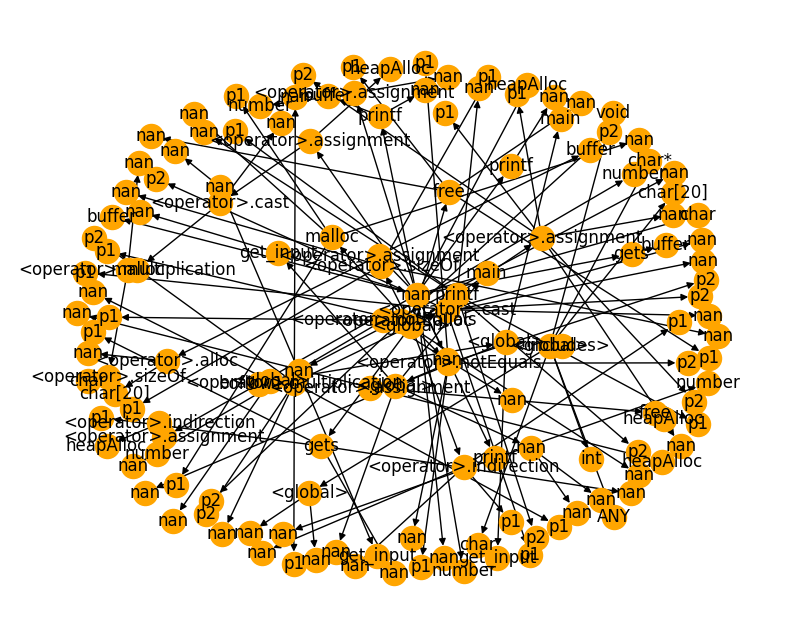

In [ ]:
cpg_manipulation.visualize_graph(boflow_AST, 'NAME:string')

In [ ]:
cpg_manipulation.visualize_graph(boflow_AST, 'NAME:string')

In [ ]:
def augment_graph(graph, feature):
    labels = {node: data.get(feature, node) for node, data in graph.nodes(data=True)}
    fig, ax = plt.subplots(figsize=(10, 8))
    pos = nx.spring_layout(graph, seed=42)
    nx.draw(graph, pos, labels=labels, with_labels=True, ax=ax, node_color='orange', arrows=True)
    plt.show()